In [18]:
import os
import openpyxl
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [19]:
responses_path = "../data/responses/form_responses.xlsx"

In [20]:
dic = {
    'EXP A': 'expA',
    'EXP B': 'expB',
    'EXP C': 'expC',
    'EXP D': 'expD',
    'EXP E': 'expE',
}

In [21]:
# List of class directories
class_directories = ['expA', 'expB', 'expC', 'expD', 'expE']

In [22]:
shuffle_folder = "../data/experiment/shuffled"
# get the actual classes
actual_classes = []
image_files = os.listdir(shuffle_folder)
for image_file in image_files:
    for key in dic.keys():
        if dic[key] in image_file:
            actual_classes.append(dic[key])
            break

In [23]:
workbook = openpyxl.load_workbook(responses_path)
sheet = workbook.active
nb_classes = len(class_directories)
confusion_matrix = np.zeros((nb_classes, nb_classes))

user_accuracies = []
for row in sheet.iter_rows(min_row=2, values_only=True):
    correct_count = 0   
    for column in range(8, 108):
        predicted = dic[row[column]]
        actual = actual_classes[column - 8]
        predicted_index = actual_index = -1
        for idx, cls in enumerate(class_directories):
            if cls == predicted:
                predicted_index = idx
            if cls == actual:
                actual_index = idx
        if predicted == actual:
            correct_count += 1
        confusion_matrix[actual_index, predicted_index] += 1
    accuracy = round(100 * correct_count / 100, 2)   
    user_accuracies.append(accuracy)
    
average_accuracy = round(sum(user_accuracies) / len(user_accuracies), 2)
confusion_matrix = confusion_matrix / len(user_accuracies)

In [24]:
print(f"Accuracy: {average_accuracy}%")

Accuracy: 24.8%


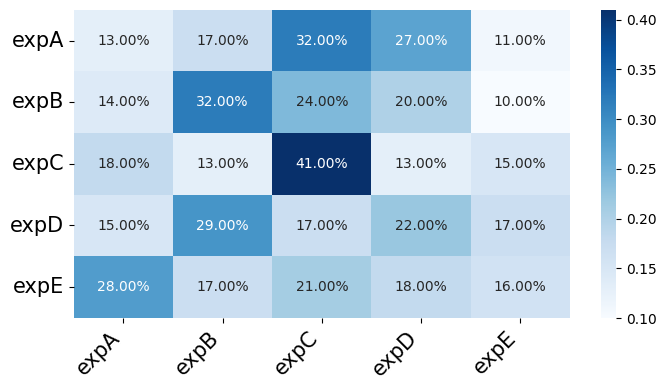

In [25]:
plt.figure(figsize=(8,4))

class_names = list(class_directories)
confusion_matrix = confusion_matrix / confusion_matrix.sum(axis=1, keepdims=True)
df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names).astype(float)
heatmap = sns.heatmap(df_cm, annot=True, fmt='.2%',  cmap='Blues')

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right',fontsize=15)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right',fontsize=15)
plt.show()